# Turing Machine and Deep Learning
_Author: Satchit Chatterji (satchit.chatterji@gmail.com)_

## Lecture 3 -- Unsupervised Learning methods
> Today's question: **How do I understand unlabelled data points?**

This notebook is a guide into the most common and arguably most useful unsupervised learning algorithms.

*Note: More on K-Means can be found in the notebook from [Python for Data Science](https://github.com/satchitchatterji/PythonForDataScience/blob/main/lecture4/Tangent_K_means_clustering.ipynb).*

#### Notebook outline:
- Dataset MNIST
- PCA decomposition
- K-Means clustering
- Gaussian Mixture Models

In [1]:
# import important libraries and dataset
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Principal Component Analysis

[5 0 4 ... 5 6 8]


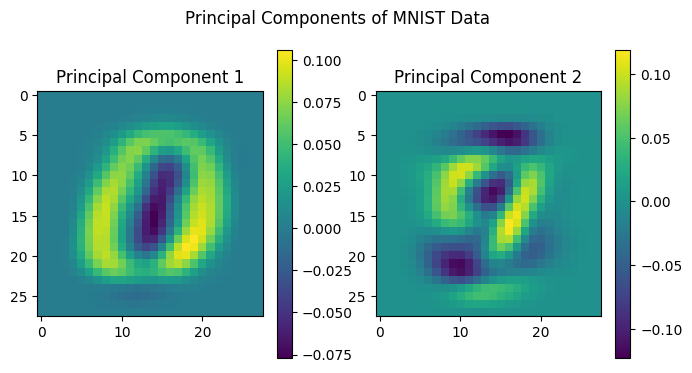

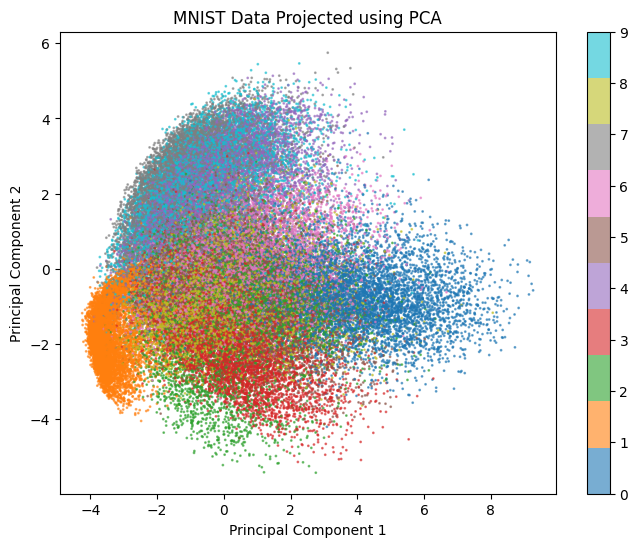

In [2]:
# Load MNIST dataset: we saw this last week too!
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train)

# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# Data preprocessing: reshape and normalize the data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train = x_train / 255.
x_test = x_test / 255.

# Set up PCA object
pca = PCA(n_components=2)  # Set the desired number of components
# Perform covariance matrix computation and eigendecomposition,
# and project data to lower dimension
x_train_pca = pca.fit_transform(x_train)

# Plotting the principal components
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for i, c in enumerate(pca.components_):
    pos = ax[i].imshow(c.reshape(28, 28))
    plt.colorbar(pos)
    ax[i].set_title(f"Principal Component {i+1}")
plt.suptitle('Principal Components of MNIST Data')
plt.show()

# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=1)
plt.colorbar()
plt.title('MNIST Data Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

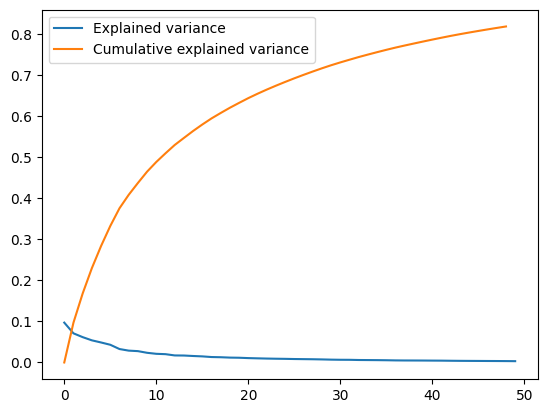

In [ ]:
pca = PCA(n_components=50)  # Set the desired number of components
# perform covariance matrix computation
# and eigendecomposition
x_train_pca = pca.fit(x_train)
# print(pca.explained_variance_)

powers = pca.explained_variance_ratio_
# print(powers[:2])
plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative explained variance")
plt.legend()
plt.show()

# K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


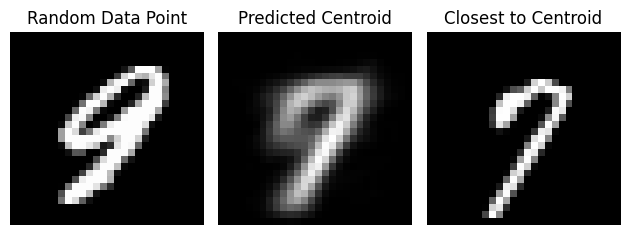

In [ ]:
# import KMeans class
from sklearn.cluster import KMeans

# Select a random subset of the dataset
random_subset = np.random.choice(len(x_train), size=2000, replace=False)
x_subset = x_train[random_subset]

# Perform K-means clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_subset)

# Randomly select a data point
random_index = np.random.randint(len(x_subset))
random_data_point = x_subset[random_index]

# Predict the cluster for the selected data point
predicted_cluster = kmeans.predict([random_data_point])

# Get the cluster center for the predicted cluster
predicted_center = kmeans.cluster_centers_[predicted_cluster]

# get the closest training point to the predicted center
closest_point_to_pred = np.argmin(kmeans.transform(x_subset)[:,predicted_cluster])

# Reshape the data point and the cluster center for visualization
random_data_point_img = random_data_point.reshape(28, 28)
predicted_center_img = predicted_center.reshape(28, 28)
closest_pred_img = x_subset[closest_point_to_pred].reshape(28, 28)

# Plot images
plt.subplot(1, 3, 1)
plt.imshow(random_data_point_img, cmap='gray')
plt.title('Random Data Point')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(predicted_center_img, cmap='gray')
plt.title('Predicted Centroid')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closest_pred_img, cmap='gray')
plt.title('Closest to Centroid')
plt.axis('off')

plt.tight_layout()
plt.show()

## Plotting the centroids

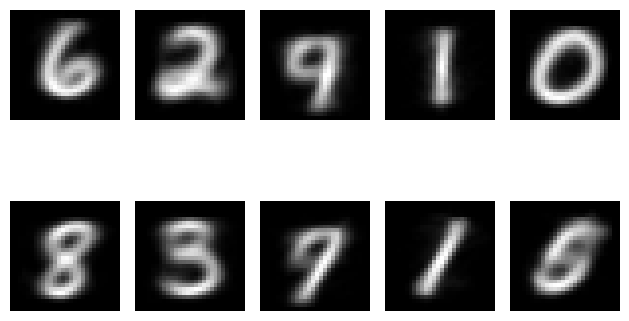

In [ ]:
fig, axs = plt.subplots(2,5)
axs = axs.flatten()

for i, center in enumerate(kmeans.cluster_centers_):
    axs[i].imshow(center.reshape(28,28),cmap="gray")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Evaluating the usefulness of the elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

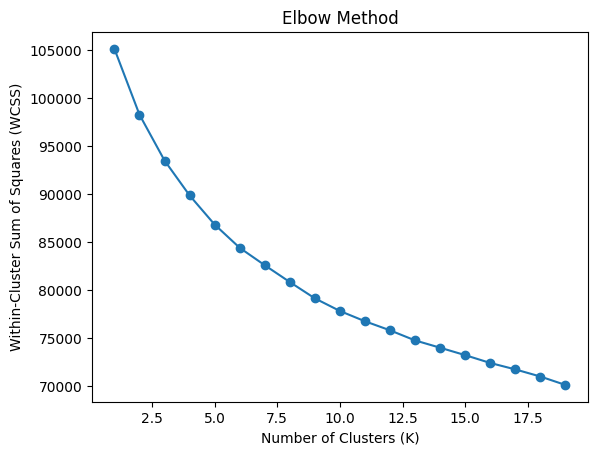

In [ ]:
# Perform K-means clustering for different values of K
wcss = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_subset)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Gaussian Mixture Models

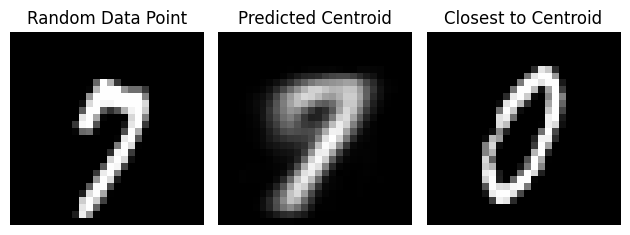

In [ ]:
# import GMM class
from sklearn.mixture import GaussianMixture

# Select a random subset of the dataset
random_subset = np.random.choice(len(x_train), size=2000, replace=False)
x_subset = x_train[random_subset]

# Perform K-means clustering
gmm = GaussianMixture(15)
gmm.fit(x_subset)

# Randomly select a data point
random_index = np.random.randint(len(x_subset))
random_data_point = x_subset[random_index]

# Predict the cluster for the selected data point
predicted_cluster = gmm.predict([random_data_point])

# Get the cluster center for the predicted cluster
predicted_center = gmm.means_[predicted_cluster]

# get the closest training point to the predicted center
closest_point_to_pred = np.argmax(gmm.predict_proba(x_subset)[:,predicted_cluster])

# Reshape the data point and the cluster center for visualization
random_data_point_img = random_data_point.reshape(28, 28)
predicted_center_img = predicted_center.reshape(28, 28)
closest_pred_img = x_subset[closest_point_to_pred].reshape(28, 28)

# Plot images
plt.subplot(1, 3, 1)
plt.imshow(random_data_point_img, cmap='gray')
plt.title('Random Data Point')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(predicted_center_img, cmap='gray')
plt.title('Predicted Centroid')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closest_pred_img, cmap='gray')
plt.title('Closest to Centroid')
plt.axis('off')

plt.tight_layout()
plt.show()

## Plotting the centroids

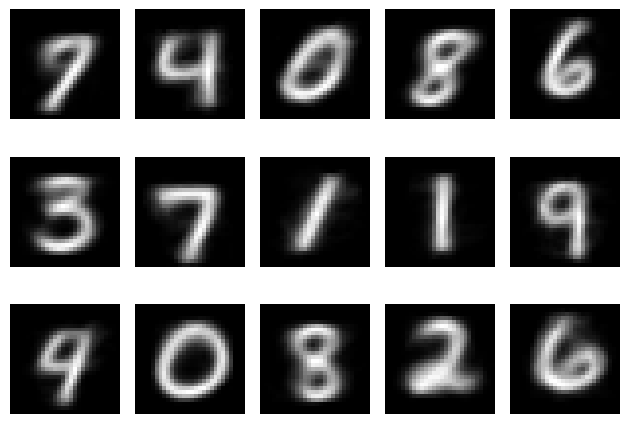

In [ ]:
fig, axs = plt.subplots(3,5)
axs = axs.flatten()

for i, center in enumerate(gmm.means_):
    axs[i].imshow(center.reshape(28,28),cmap="gray")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Generative models: A quick look

An explicit generative model models the PDF of the data directly. Sampling from these distributions will give us new, generated examples.

Generating random samples of class 9


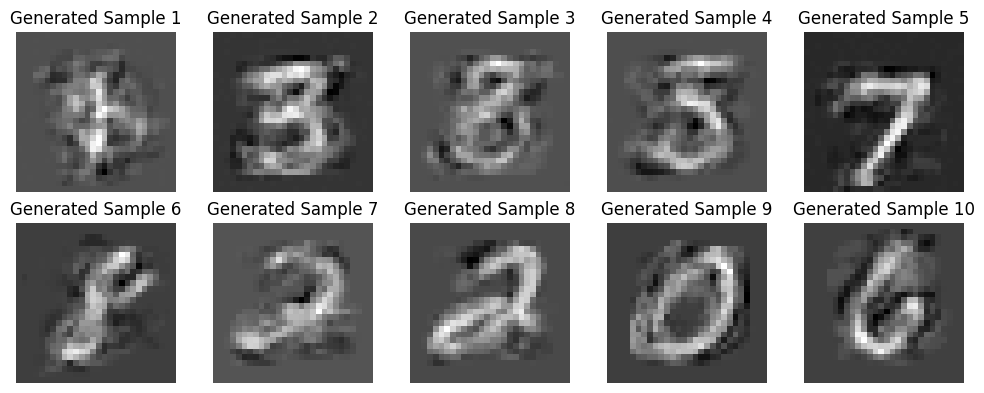

In [ ]:
# Select a random class from the training set
random_class = np.random.randint(0, 10)
print("Generating random samples of class", random_class)

# Filter the training set for samples of the random class
# class_samples = x_train[y_train == random_class]
class_samples = x_train[:1000]

# Create a Gaussian Mixture Model with 10 components
gmm = GaussianMixture(n_components=10, random_state=42)

# Fit the GMM to the class samples
gmm.fit(class_samples)

# Generate new samples from the fitted GMM
generated_samples = gmm.sample(10)[0]

# Reshape the generated samples for visualization
generated_samples_imgs = generated_samples.reshape(-1, 28, 28)

# Plot the generated samples
plt.figure(figsize=(10, 4))
for i in range(len(generated_samples)):
    plt.subplot(2, 5, i+1)
    plt.imshow(generated_samples_imgs[i], cmap='gray')
    plt.title('Generated Sample {}'.format(i+1))
    plt.axis('off')

plt.tight_layout()
plt.show()
